In [1]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister, Aer, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from math import pi
from qiskit.quantum_info import Statevector
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

# Two-qubit Operations

In [2]:
q = QuantumRegister(2)
qc = QuantumCircuit(q)

qc.h(0)
qc.cx(0, 1)

statevector = Statevector(qc)

print('Example of a 2-qubit statevector')
statevector.draw(output='latex')

Example of a 2-qubit statevector


<IPython.core.display.Latex object>

Below is an example of the CNOT gate (AKA Controlled-X or Controlled-NOT) from lecture where q1 is the
control qubit and q2 is the target qubit.

In [3]:
qc = QuantumCircuit(q)
qc.cx(q[1],q[0])

job = backend.run(transpile(qc, backend))
print('CNOT Matrix:')
job.result().get_unitary(qc)

CNOT Matrix:


array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

As an example, we will show $C X_0 C = X_0 X_1$.

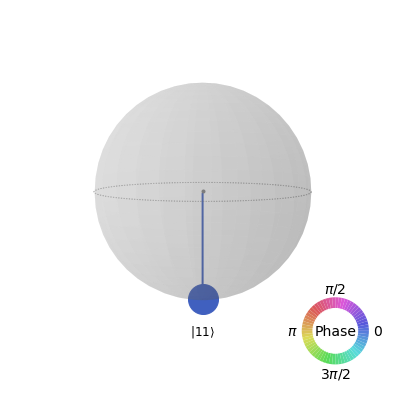

In [4]:
qc = QuantumCircuit(q)
qc.cx(0,1)
qc.x(0)
qc.cx(0,1)

# We can visualize the state using the qsphere
state = Statevector(qc)
state.draw('qsphere')

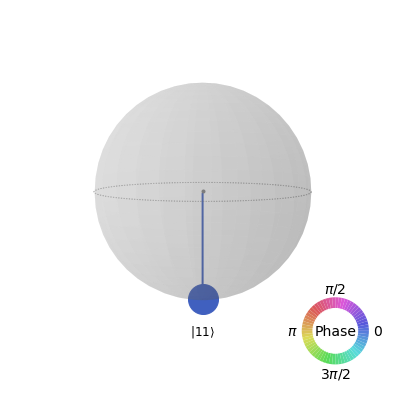

In [5]:
qc = QuantumCircuit(q)
qc.x(0)
qc.x(1)

state = Statevector(qc)
state.draw('qsphere')

Next, we will work with the Controlled-Z gate (AKA Controlled Phase-Flip gate).

In [6]:
qc = QuantumCircuit(q)
qc.cz(q[0],q[1])

job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc,decimals=3)

array([[ 1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

We see that the above matrix is the same as shown in lecture.
As an example, we will show that we can construct a CNOT gate
using Controlled-Z and Hadamard gates.

In [7]:
qc = QuantumCircuit(q)
qc.h(0)
qc.cz(q[1],q[0])
qc.h(0)

job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc,decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

This result is the same as the CNOT gate above.